In [10]:
#Group 4 Members: Christine, Shai, Abdi, Zigg
import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Use Agg for matplotlib
import matplotlib.pyplot as plt
plt.switch_backend('Agg')  # In case only plt is imported

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.inspection import permutation_importance

%matplotlib inline

sns.set(style='whitegrid', palette='muted')

In [2]:
df = pd.read_csv("household_energy_consumption.csv")
# Display the first few rows
df.head()

,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh
0,H00001,2025-04-01,8.4,4,17.8,No,3.2
1,H00001,2025-04-02,7.9,4,17.3,No,2.8
2,H00001,2025-04-03,9.2,4,18.6,No,3.0
3,H00001,2025-04-04,7.9,4,18.2,No,2.7
4,H00001,2025-04-05,9.6,4,11.9,No,3.2


In [3]:
# Quick dataset exploration
print('Dataset shape:', df.shape)
print('Data types:')
print(df.dtypes)

# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

Dataset shape: (90000, 7)
Data types:
Household_ID               object
Date                       object
Energy_Consumption_kWh    float64
Household_Size              int64
Avg_Temperature_C         float64
Has_AC                     object
Peak_Hours_Usage_kWh      float64
dtype: object
Missing values per column:
Household_ID              0
Date                      0
Energy_Consumption_kWh    0
Household_Size            0
Avg_Temperature_C         0
Has_AC                    0
Peak_Hours_Usage_kWh      0
dtype: int64


In [4]:
# Converting the 'Date' column from string to datetime
try:
    df['Date'] = pd.to_datetime(df['Date'])
except Exception as e:
    print('Error converting Date column:', e)

# Only convert 'Has_AC' if it exists
if 'Has_AC' in df.columns:
    df['Has_AC'] = df['Has_AC'].map({'Yes': 1, 'No': 0})

# Fill missing values using forward fill
df.fillna(method='ffill', inplace=True)

# Display cleaned summary
df.describe(include='all')


C:\Users\Not Assigned 018\AppData\Local\Temp\ipykernel_51076\957847491.py:12: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,Household_ID,Date,Energy_Consumption_kWh,Household_Size,Avg_Temperature_C,Has_AC,Peak_Hours_Usage_kWh
count,90000,90000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
unique,12857,NaN,NaN,NaN,NaN,NaN,NaN
top,H12857,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2025-04-04 00:00:03.840000256,10.571988,3.487811,17.505802,0.494356,4.319557
min,NaN,2025-04-01 00:00:00,0.500000,1.000000,10.000000,0.000000,0.200000
25%,NaN,2025-04-02 00:00:00,6.000000,2.000000,15.800000,0.000000,2.300000
50%,NaN,2025-04-04 00:00:00,10.400000,3.000000,17.500000,0.000000,4.000000
75%,NaN,2025-04-06 00:00:00,14.800000,5.000000,19.200000,1.000000,6.000000
max,NaN,2025-04-08 00:00:00,20.000000,6.000000,25.000000,1.000000,10.000000


In [5]:
print(df.columns.tolist())

['Household_ID', 'Date', 'Energy_Consumption_kWh', 'Household_Size', 'Avg_Temperature_C', 'Has_AC', 'Peak_Hours_Usage_kWh']


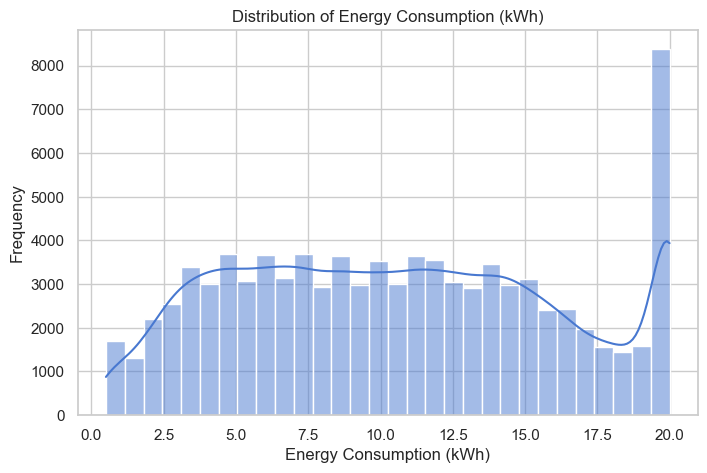

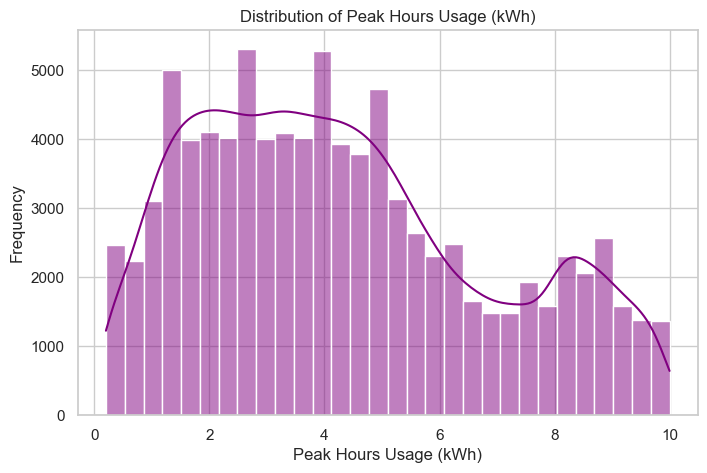

In [9]:
# Histogram for Energy Consumption
plt.figure(figsize=(8, 5))
sns.histplot(df['Energy_Consumption_kWh'], kde=True, bins=30)
plt.title('Distribution of Energy Consumption (kWh)')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Frequency')
plt.show()

# Histogram for Peak Hours Usage
plt.figure(figsize=(8, 5))
sns.histplot(df['Peak_Hours_Usage_kWh'], kde=True, bins=30, color='purple')
plt.title('Distribution of Peak Hours Usage (kWh)')
plt.xlabel('Peak Hours Usage (kWh)')
plt.ylabel('Frequency')
plt.show()

Mean Squared Error: 1.93301466603253
R² Score: 0.9365270005722419


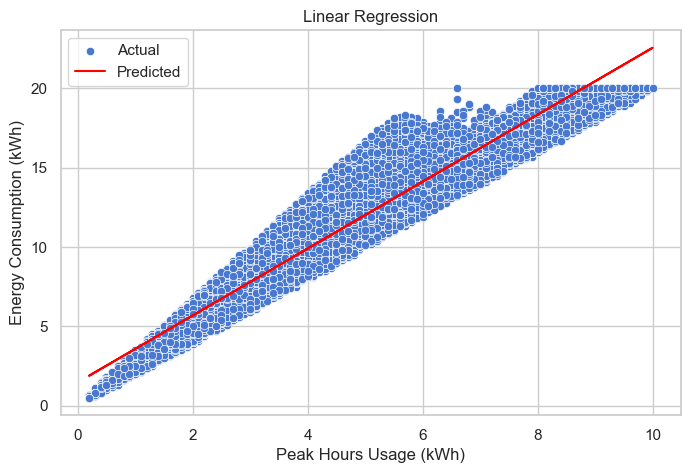

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Example: using 'Peak_Hours_Usage_kWh' to predict 'Energy_Consumption_kWh'
# Replace these with your actual column names
X = df[['Peak_Hours_Usage_kWh']]   # Feature (independent variable)
y = df['Energy_Consumption_kWh']   # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model and fit it
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot the regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_test.squeeze(), y=y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.xlabel('Peak Hours Usage (kWh)')
plt.ylabel('Energy Consumption (kWh)')
plt.title('Linear Regression')
plt.legend()
plt.show()
